In [166]:
import time
import numpy as np
import pandas as pd
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.optimizers import SGD, Adam

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# preprocess load data

In [137]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train.feather' 
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train_sample.feather' 
train_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))


load feather %s seconds 1.522301435470581


In [138]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test.feather'
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test_sample.feather' 

test_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))

load feather %s seconds 0.3715088367462158


In [139]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [140]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [141]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize



In [142]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [143]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [144]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent Internet User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No significant preference', 'Portal', 'Social-media'], dtype=object)

In [145]:
len(train_y)

1506103

In [146]:
len(test_y)

376526

# construct and compile model

In [147]:
classify_num = 11
epochs = 300
batch = 128

# basic config

In [150]:
start_time = time.time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(1024, input_shape=train_x[0].shape ))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

# rms = RMSprop()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])


print('Model compield in {0} seconds'.format(time.time() - start_time))


Compiling Model ... 
Model compield in 0.12836360931396484 seconds


# Train model

In [151]:
start_time = time.time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time.time() - start_time))


Training model...
Train on 1355492 samples, validate on 150611 samples
Epoch 1/300
64s - loss: 1.9472 - acc: 0.2991 - val_loss: 1.9106 - val_acc: 0.3110
Epoch 2/300
66s - loss: 1.9029 - acc: 0.3097 - val_loss: 1.9087 - val_acc: 0.3029
Epoch 3/300
67s - loss: 1.8933 - acc: 0.3123 - val_loss: 1.8879 - val_acc: 0.3155
Epoch 4/300
66s - loss: 1.8867 - acc: 0.3144 - val_loss: 1.8857 - val_acc: 0.3155
Epoch 5/300
66s - loss: 1.8824 - acc: 0.3156 - val_loss: 1.8836 - val_acc: 0.3160
Epoch 6/300
65s - loss: 1.8775 - acc: 0.3161 - val_loss: 1.8892 - val_acc: 0.3119
Epoch 7/300
64s - loss: 1.8728 - acc: 0.3175 - val_loss: 1.8701 - val_acc: 0.3172
Epoch 8/300
65s - loss: 1.8696 - acc: 0.3183 - val_loss: 1.8710 - val_acc: 0.3183
Epoch 9/300
65s - loss: 1.8690 - acc: 0.3191 - val_loss: 1.8757 - val_acc: 0.3185
Epoch 10/300
63s - loss: 1.8660 - acc: 0.3193 - val_loss: 1.8653 - val_acc: 0.3211
Epoch 11/300
66s - loss: 1.8641 - acc: 0.3198 - val_loss: 1.8641 - val_acc: 0.3220
Epoch 12/300
66s - loss: 

64s - loss: 1.8375 - acc: 0.3286 - val_loss: 1.8601 - val_acc: 0.3237
Epoch 100/300
63s - loss: 1.8379 - acc: 0.3286 - val_loss: 1.8634 - val_acc: 0.3233
Epoch 101/300
62s - loss: 1.8386 - acc: 0.3286 - val_loss: 1.8643 - val_acc: 0.3238
Epoch 102/300
62s - loss: 1.8377 - acc: 0.3287 - val_loss: 1.8654 - val_acc: 0.3232
Epoch 103/300
62s - loss: 1.8374 - acc: 0.3285 - val_loss: 1.8609 - val_acc: 0.3222
Epoch 104/300
63s - loss: 1.8368 - acc: 0.3292 - val_loss: 1.8660 - val_acc: 0.3221
Epoch 105/300
63s - loss: 1.8366 - acc: 0.3290 - val_loss: 1.8649 - val_acc: 0.3220
Epoch 106/300
63s - loss: 1.8371 - acc: 0.3288 - val_loss: 1.8747 - val_acc: 0.3219
Epoch 107/300
63s - loss: 1.8369 - acc: 0.3287 - val_loss: 1.8640 - val_acc: 0.3225
Epoch 108/300
63s - loss: 1.8377 - acc: 0.3290 - val_loss: 1.8677 - val_acc: 0.3231
Epoch 109/300
62s - loss: 1.8368 - acc: 0.3289 - val_loss: 1.8635 - val_acc: 0.3226
Epoch 110/300
62s - loss: 1.8368 - acc: 0.3290 - val_loss: 1.8652 - val_acc: 0.3223
Epoch 

64s - loss: 1.8443 - acc: 0.3265 - val_loss: 1.8656 - val_acc: 0.3202
Epoch 198/300
67s - loss: 1.8430 - acc: 0.3276 - val_loss: 1.8651 - val_acc: 0.3228
Epoch 199/300
66s - loss: 1.8426 - acc: 0.3270 - val_loss: 1.8663 - val_acc: 0.3223
Epoch 200/300
66s - loss: 1.8445 - acc: 0.3265 - val_loss: 1.8673 - val_acc: 0.3186
Epoch 201/300
65s - loss: 1.8443 - acc: 0.3261 - val_loss: 1.8683 - val_acc: 0.3204
Epoch 202/300
64s - loss: 1.8418 - acc: 0.3275 - val_loss: 1.8759 - val_acc: 0.3205
Epoch 203/300
66s - loss: 1.8423 - acc: 0.3272 - val_loss: 1.8711 - val_acc: 0.3208
Epoch 204/300
64s - loss: 1.8432 - acc: 0.3270 - val_loss: 1.8677 - val_acc: 0.3233
Epoch 205/300
64s - loss: 1.8417 - acc: 0.3272 - val_loss: 1.8699 - val_acc: 0.3203
Epoch 206/300
64s - loss: 1.8433 - acc: 0.3269 - val_loss: 1.8684 - val_acc: 0.3203
Epoch 207/300
65s - loss: 1.8433 - acc: 0.3270 - val_loss: 1.8650 - val_acc: 0.3220
Epoch 208/300
64s - loss: 1.8432 - acc: 0.3265 - val_loss: 1.8675 - val_acc: 0.3212
Epoch 

65s - loss: 1.8425 - acc: 0.3279 - val_loss: 1.8724 - val_acc: 0.3222
Epoch 296/300
67s - loss: 1.8408 - acc: 0.3288 - val_loss: 1.8715 - val_acc: 0.3212
Epoch 297/300
65s - loss: 1.8411 - acc: 0.3281 - val_loss: 1.8735 - val_acc: 0.3201
Epoch 298/300
68s - loss: 1.8407 - acc: 0.3285 - val_loss: 1.8679 - val_acc: 0.3227
Epoch 299/300
63s - loss: 1.8409 - acc: 0.3282 - val_loss: 1.8699 - val_acc: 0.3215
Epoch 300/300
67s - loss: 1.8412 - acc: 0.3281 - val_loss: 1.8765 - val_acc: 0.3194
Training duration : 19559.107285022736


In [152]:
train_time = time.time() - start_time

# save model

In [153]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


# test model and get accuracy

In [154]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

376000/376526 [============================>.] - ETA: 0s

In [155]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


acc: 31.75%


# send mail to alert

In [156]:
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

In [157]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



In [158]:
test=mail()
test.main("model finished", model_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


# write readme to report the model

In [159]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [160]:
print(model_info)

layer - > 0===============
class_name = Dense
units = 1024
activation = linear
layer - > 1===============
class_name = Dense
units = 512
activation = linear
layer - > 2===============
class_name = Activation
activation = relu
layer - > 3===============
class_name = Dense
units = 256
activation = linear
layer - > 4===============
class_name = Activation
activation = relu
layer - > 5===============
class_name = Dense
units = 128
activation = linear
layer - > 6===============
class_name = Activation
activation = relu
layer - > 7===============
class_name = Dense
units = 64
activation = linear
layer - > 8===============
class_name = Activation
activation = relu
layer - > 9===============
class_name = Dense
units = 32
activation = linear
layer - > 10===============
class_name = Activation
activation = relu
layer - > 11===============
class_name = Dense
units = 11
activation = linear
layer - > 12===============
class_name = Activation
activation = softmax

train epochs = 300
train batch = 12

In [161]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [162]:
pred = model.predict(test_x)

In [163]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

array([[    2,     0,     0,   133,  1531,  4327,     2,    15,  4286,
          212,   372],
       [    1,     0,     0,   790,  4520,  7164,     9,    21,  3999,
          189,   598],
       [    0,     0,     0,   226,  2012,  9094,    19,     9,  3134,
          220,   316],
       [    2,     0,     0, 15845,  7958,  1301,     1,    98,  2876,
          103,   781],
       [    5,     0,     0,  5097, 33694, 35258,    50,    71,  8401,
          364,  1982],
       [    5,     0,     0,  1549, 20582, 50253,    61,    47, 11332,
          484,  1864],
       [    0,     0,     0,    90,  4844, 15572,    51,     1,   447,
            6,    10],
       [    7,     0,     0,   573,  3046,  4076,     0,   203,  2903,
           65,   501],
       [    8,     0,     0,  2100,  9267, 23049,    12,    65, 16852,
          630,  1421],
       [    3,     0,     0,  1086,  4264,  6145,     2,    18,  6640,
          713,   696],
       [    1,     0,     0,   987,  7481, 12122,     6,    

In [169]:
cnf_matrix_df = pd.DataFrame(cnf_matrix)

In [170]:
cnf_matrix_df

,0,1,2,3,4,5,6,7,8,9,10
0,2,0,0,133,1531,4327,2,15,4286,212,372
1,1,0,0,790,4520,7164,9,21,3999,189,598
2,0,0,0,226,2012,9094,19,9,3134,220,316
3,2,0,0,15845,7958,1301,1,98,2876,103,781
4,5,0,0,5097,33694,35258,50,71,8401,364,1982
5,5,0,0,1549,20582,50253,61,47,11332,484,1864
6,0,0,0,90,4844,15572,51,1,447,6,10
7,7,0,0,573,3046,4076,0,203,2903,65,501
8,8,0,0,2100,9267,23049,12,65,16852,630,1421
9,3,0,0,1086,4264,6145,2,18,6640,713,696


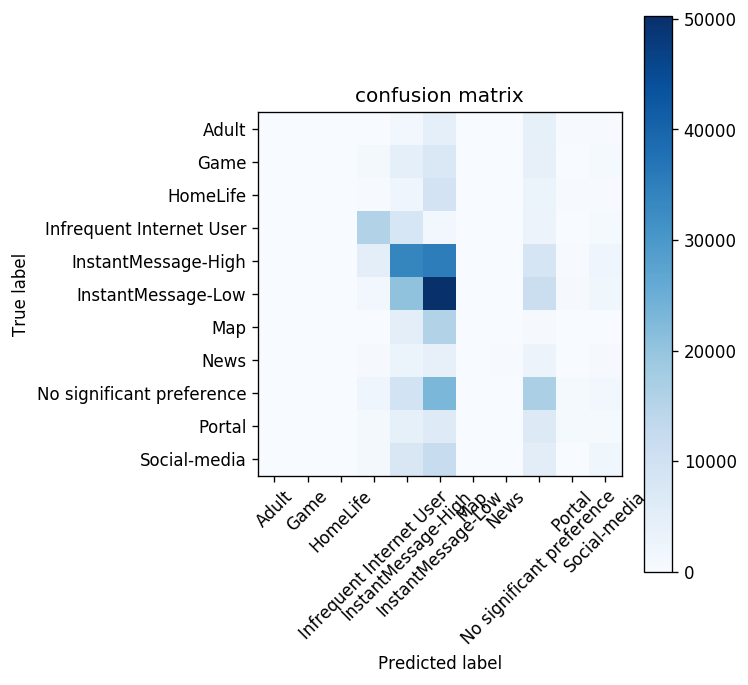

In [164]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [134]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)